<a href="https://colab.research.google.com/github/BrianKipngeno/Real-estate-house-price-prediction-with-neural-networks/blob/main/House_price_prediction_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We'll explore how to use PyTorch to solve regression problems. Specifically, we will be predicting the price per unit area of a house, using a dataset containing various features such as the transaction date, house age, distance to the nearest mass rapid transit station, number of convenience stores, latitude and longitude.

Dataset link:  https://bit.ly/47KnAH5

### Step 1: Data preparation

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Let's import the real estate dataset
df = pd.read_csv('https://bit.ly/47KnAH5')

df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
#Let's split the dataset into training and test sets
from sklearn.model_selection import train_test_split # Importing the train_test_split function from sklearn.model_selection

In [ ]:
# Let's divides the dataset into features(Input) and labels sets(Output)
X = df.drop(["No", "Y house price of unit area"], axis = 1).values

y = df.filter(["Y house price of unit area"], axis = 1).values

In [ ]:
# Let's split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# We then convert the dataset features and labels to torch tensors.
X_train = torch.tensor(X_train).float()

X_test = torch.tensor(X_test).float()

y_train = torch.tensor(y_train).float()

y_test = torch.tensor(y_test).float()

### Step 2: Building the model

We define our PyTorch neural network model that has six fully connected layers and with input size of 6 (corresponding to six input features) and output size of 1. This means it takes a tensor of size (batch_size, 6) as input and produces a tensor of size (batch_size, 1) as output. We notice that the last layer has no activation function since this is a regression problem and we want to predict continuous values.

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Let's build our model
class Net(nn.Module):
    def __init__(self):

        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

model = Net()

### Step 3,4 & 5

**Training the model**

Just like in classification, we define the loss function and optimizer used to train the model, as well as the training loop itself. For regression , we use the Mean Squared Error (MSE) loss.This measures the average squared difference between the predicted output and the true output. All the steps are similar to the classification task.

In [ ]:
# Training the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000

loss_vals = []

for epoch in range(num_epochs):

   # Clear out the gradients from the last step loss.backward()
    optimizer.zero_grad()

   # Step 3: Forward prpagation
    outputs = model(X_train)

   # Step 4: Loss computation
    loss = criterion(outputs, y_train)

   # Step 5: Backward propagation to calculate gradients
    loss.backward()

    loss_vals.append(loss.detach().numpy().item())

   # Updating the weights
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 82.1704
Epoch [200/1000], Loss: 79.2420
Epoch [300/1000], Loss: 77.4114
Epoch [400/1000], Loss: 72.3240
Epoch [500/1000], Loss: 72.2771
Epoch [600/1000], Loss: 71.7653
Epoch [700/1000], Loss: 68.9116
Epoch [800/1000], Loss: 65.9271
Epoch [900/1000], Loss: 64.1874
Epoch [1000/1000], Loss: 65.1934


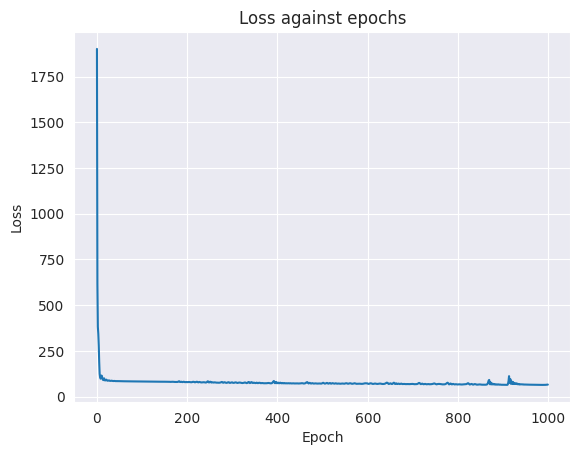

In [ ]:
# Let's plot our loss to identify any anomalies
import seaborn as sns

sns.set_style('darkgrid')

indexes = list(range(len(loss_vals)))

sns.lineplot(x = indexes, y = loss_vals)

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.title('Loss against epochs')

plt.show()

### Step 6: Making predictions on pour test set

In regression, the calculated predictions are compared to the true labels from the test set, and the Mean Absolute Error and Mean Squared Errors are computed using the respective metrics. MAE represents the average absolute difference between predicted and true values, providing a measure of the model's accuracy. MSE measures the average squared difference between predicted and true values, emphasizing larger errors. Lower values for both MAE and MSE indicate better model performance, with the evaluation metrics providing insights into the model's accuracy and precision on the given regression task.

In [ ]:
# Let's make our prediction
model.requires_grad_(False)

outputs = model(X_test)

mae = mean_absolute_error(y_test, outputs)

mse = mean_squared_error(y_test, outputs)

print(f'Mean absolute error: {mae:.2f}')

print(f'Mean squared error: {mse:.2f}')

Mean absolute error: 5.16
Mean squared error: 52.98


The result shows that on average, we are only off by a value of 5.48 for price per unit area of the house.

We can compare the actual and predicted values. To do this, we first need to convert the outputs tensor and the y_test tensor from PyTorch tensors to Python list. We create Pandas DataFrame called results to display the actual and predicted costs of the first 10 houses in the test set.

In [ ]:
# Let's compare these values
predictions = [item for sublist in outputs.tolist() for item in sublist]

y_test = [item for sublist in y_test.tolist() for item in sublist]

results = pd.DataFrame({'Actual Cost': y_test, 'Predicted Cost': predictions})

results.head(10)

,Actual Cost,Predicted Cost
0,45.299999,46.362061
1,14.400000,17.674740
2,46.000000,39.544781
3,15.600000,17.700119
4,50.200001,43.320232
5,38.099998,36.128662
6,48.500000,40.456669
7,41.400002,33.310383
8,51.599998,51.310398
9,40.099998,38.939915


### Making inference on new data




In [ ]:
# The model.eval() method is used to set a model in evaluation mode. it disables certain operations  active during training but are not desired during evaluation or inference.
model.eval()

# New observations
new_data = [2013.833, 11.7, 179.4823, 5, 22.97388, 121.54681]

# Convert data to PyTorch tensor
new_data_tensor = torch.tensor(new_data, dtype=torch.float32).view(1, -1)  # Reshape to (1, input_size)

# Perform inference
with torch.no_grad():
    prediction = model(new_data_tensor)

# Print or use the prediction for further analysis
print("Predicted house price per unit area:", prediction.item())

Predicted house price per unit area: 45.39051818847656
